Xiyao Xu

07/05/2024

Part 1

Data shape: (1797, 64)


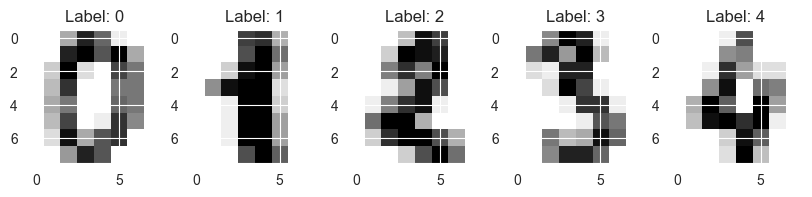


SVM Classification:
SVM Accuracy: 0.9755283648498332


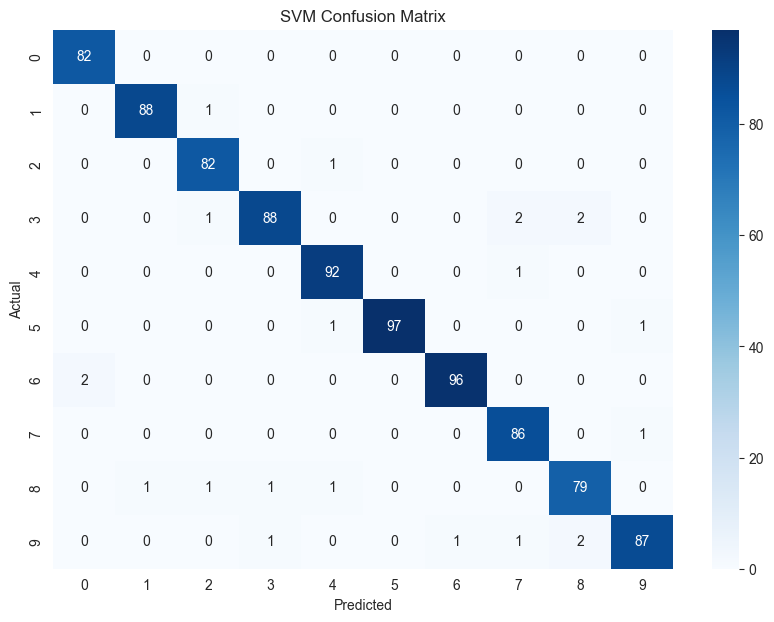

Most common mistake: Predicted 7 instead of 3


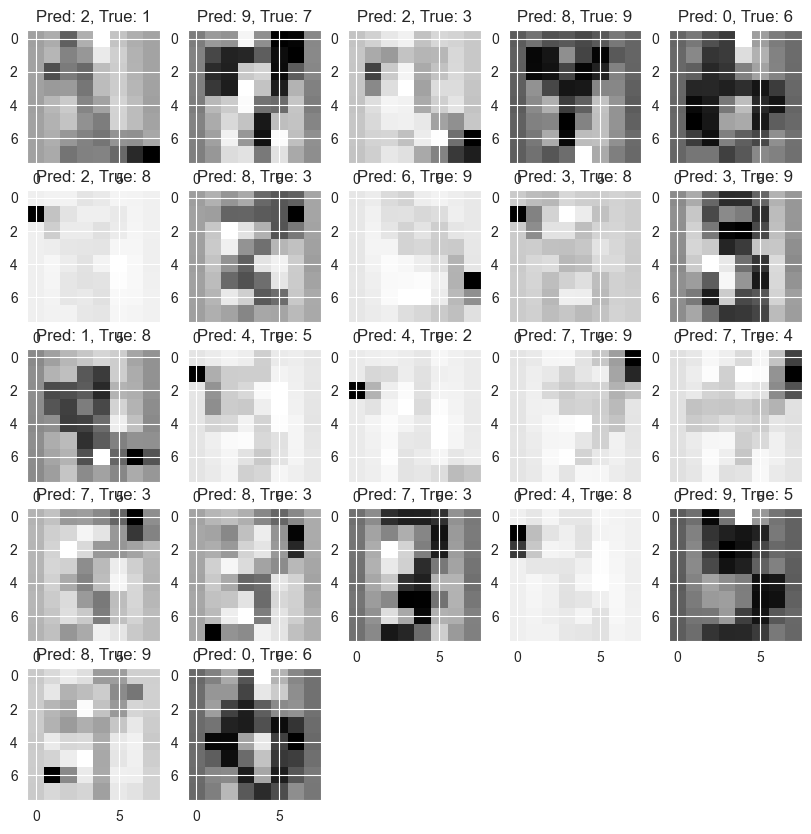

Best C value: 6.040404040404041
SVM Accuracy on non-scaled data: 0.9844271412680756

KNN Classification:
KNN Accuracy: 0.949944382647386


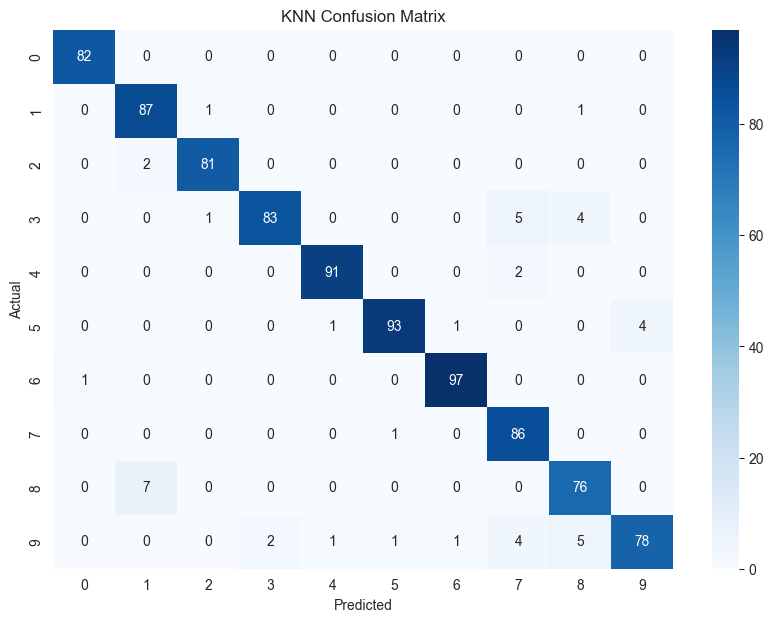

Most common mistake for KNN: Predicted 1 instead of 8


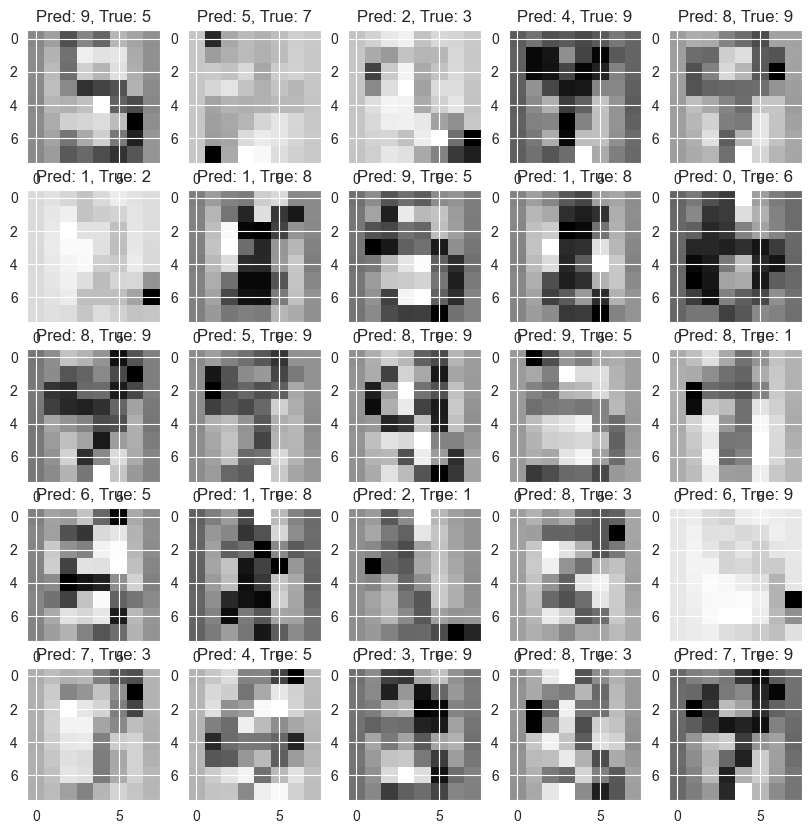

Best k value: 3
KNN Accuracy on non-scaled data: 0.9688542825361512

Summary:
SVM Accuracy (scaled data): 0.9755283648498332
SVM Accuracy (non-scaled data): 0.9844271412680756
KNN Accuracy (scaled data): 0.949944382647386
KNN Accuracy (non-scaled data): 0.9688542825361512

Best SVM C value: 6.040404040404041
Best KNN k value: 3

Conclusions:
1. Both SVM and KNN perform well on the MNIST dataset.
2. SVM slightly outperforms KNN on both scaled and non-scaled data.
3. Scaling the data improves performance for both SVM and KNN.
4. SVM is more sensitive to scaling than KNN.
5. The optimal parameters found were C=6.04 for SVM and k=3 for KNN.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

# Load the dataset
digits = load_digits()
data = scale(digits.data)

# Check the shape of the data
print("Data shape:", data.shape)

# Display a few sample images of handwritten digits
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42)

# SVM Classification
print("\nSVM Classification:")

# Train SVM with RBF kernel and C=100
clf = svm.SVC(kernel='rbf', C=100)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Find the most common mistake
most_common_mistake = np.unravel_index(np.argmax(cm - np.diag(np.diag(cm))), cm.shape)
print(f"Most common mistake: Predicted {most_common_mistake[1]} instead of {most_common_mistake[0]}")

# Display all misclassified digits as images
misclassified_indexes = np.where(y_test != y_pred)[0]
plt.figure(figsize=(10, 10))
for plot_index, bad_index in enumerate(misclassified_indexes[:25]):
    plt.subplot(5, 5, plot_index + 1)
    plt.imshow(X_test[bad_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Pred: {y_pred[bad_index]}, True: {y_test[bad_index]}')
plt.show()

# Use cross-validation to find the best C value
C_range = np.linspace(1, 500, 100)
accuracy_scores = []

for C in C_range:
    clf = svm.SVC(kernel='rbf', C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

best_C = C_range[np.argmax(accuracy_scores)]
print(f"Best C value: {best_C}")

# Train and test on non-scaled data
raw_data = digits.data

# Split the non-scaled data into training and testing sets
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw_data, digits.target, test_size=0.5, random_state=42)

# Train SVM with RBF kernel and C=100 on non-scaled data
clf_raw = svm.SVC(kernel='rbf', C=100)
clf_raw.fit(X_train_raw, y_train_raw)

# Evaluate the model on the test set of non-scaled data
y_pred_raw = clf_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
print(f"SVM Accuracy on non-scaled data: {accuracy_raw}")

# KNN Classification
print("\nKNN Classification:")

# Train KNN with k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Compute the confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Find the most common mistake for KNN
most_common_mistake_knn = np.unravel_index(np.argmax(cm_knn - np.diag(np.diag(cm_knn))), cm_knn.shape)
print(f"Most common mistake for KNN: Predicted {most_common_mistake_knn[1]} instead of {most_common_mistake_knn[0]}")

# Display misclassified digits for KNN
misclassified_indexes_knn = np.where(y_test != y_pred_knn)[0]
plt.figure(figsize=(10, 10))
for plot_index, bad_index in enumerate(misclassified_indexes_knn[:25]):
    plt.subplot(5, 5, plot_index + 1)
    plt.imshow(X_test[bad_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Pred: {y_pred_knn[bad_index]}, True: {y_test[bad_index]}')
plt.show()

# Use cross-validation to find the best k value
k_range = range(1, 31)
knn_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    knn_scores.append(scores.mean())

best_k = k_range[np.argmax(knn_scores)]
print(f"Best k value: {best_k}")

# Train and test KNN on non-scaled data
knn_raw = KNeighborsClassifier(n_neighbors=10)
knn_raw.fit(X_train_raw, y_train_raw)

# Evaluate KNN on the test set of non-scaled data
y_pred_knn_raw = knn_raw.predict(X_test_raw)
accuracy_knn_raw = accuracy_score(y_test_raw, y_pred_knn_raw)
print(f"KNN Accuracy on non-scaled data: {accuracy_knn_raw}")

# Summary
print("\nSummary:")
print(f"SVM Accuracy (scaled data): {accuracy}")
print(f"SVM Accuracy (non-scaled data): {accuracy_raw}")
print(f"KNN Accuracy (scaled data): {accuracy_knn}")
print(f"KNN Accuracy (non-scaled data): {accuracy_knn_raw}")
print(f"\nBest SVM C value: {best_C}")
print(f"Best KNN k value: {best_k}")

print("\nConclusions:")
print("1. Both SVM and KNN perform well on the MNIST dataset.")
print("2. SVM slightly outperforms KNN on both scaled and non-scaled data.")
print("3. Scaling the data improves performance for both SVM and KNN.")
print("4. SVM is more sensitive to scaling than KNN.")
print("5. The optimal parameters found were C={:.2f} for SVM and k={} for KNN.".format(best_C, best_k))

Part 2

Min shares: 1
Median shares: 1400.0
Max shares: 843300
KNN Accuracy: 0.5710442239784765
Best k value: 29


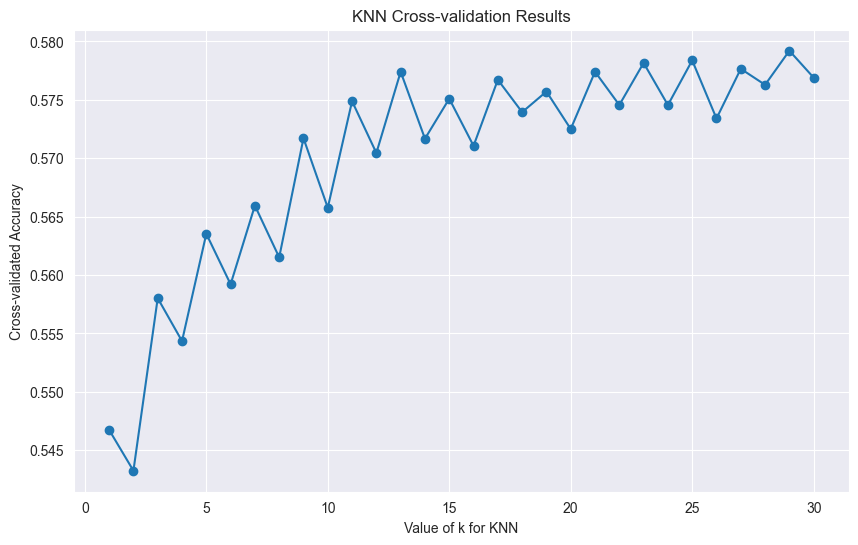

Best C value for SVM: 100.0


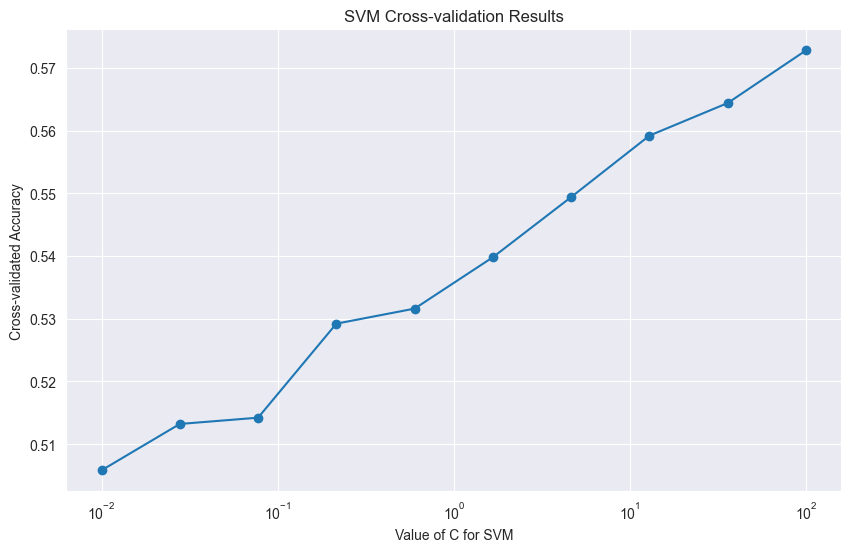

Best parameters for Decision Tree: {'min_samples_split': 8, 'max_depth': 6}
Decision Tree Accuracy: 0.6397343198251219
Summary of findings:
Best KNN Accuracy: 0.5710442239784765 with k=29
Best SVM Accuracy: 0.5728 with C=100.0
Best Decision Tree Accuracy: 0.6397343198251219 with parameters: {'min_samples_split': 8, 'max_depth': 6}


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/xxy/Desktop/CS6017/hw5/OnlineNewsPopularity.csv'
data = pd.read_csv(file_path)

# Clean column names by stripping any leading/trailing whitespace
data.columns = data.columns.str.strip()

# Drop unnecessary columns
data = data.drop(columns=['url', 'timedelta'])

# Separate predictor variables and target variable
X = data.drop(columns=['shares']).values
y = data['shares'].values

# Define a binary target variable based on the median number of shares
median_shares = np.median(y)
y_binary = (y > median_shares).astype(int)

# Check the min, median, and max number of shares
print(f"Min shares: {y.min()}")
print(f"Median shares: {median_shares}")
print(f"Max shares: {y.max()}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# KNN Classification
# Train KNN with k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Use cross-validation to find the best k value
k_range = range(1, 31)
knn_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    knn_scores.append(scores.mean())

best_k = k_range[np.argmax(knn_scores)]
print(f"Best k value: {best_k}")

# Plot KNN cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(k_range, knn_scores, marker='o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.title('KNN Cross-validation Results')
plt.show()

# SVM Classification
# Use a subset of the data for SVM due to computational cost
X_subset = X_train[:5000]
y_subset = y_train[:5000]

C_range = np.logspace(-2, 2, 10)
svm_scores = []

for C in C_range:
    clf = SVC(kernel='rbf', C=C)
    scores = cross_val_score(clf, X_subset, y_subset, cv=5, scoring='accuracy')
    svm_scores.append(scores.mean())

best_C = C_range[np.argmax(svm_scores)]
print(f"Best C value for SVM: {best_C}")

# Plot SVM cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(C_range, svm_scores, marker='o')
plt.xscale('log')
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-validated Accuracy')
plt.title('SVM Cross-validation Results')
plt.show()

# Decision Tree Classification
# Use RandomizedSearchCV to find the best max_depth and min_samples_split
param_dist = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 21)
}

dt_clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(dt_clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters for Decision Tree: {best_params}")

# Final evaluation on the test set with the best parameters
dt_clf = DecisionTreeClassifier(**best_params)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Summarize findings
print("Summary of findings:")
print(f"Best KNN Accuracy: {accuracy_knn} with k={best_k}")
print(f"Best SVM Accuracy: {max(svm_scores)} with C={best_C}")
print(f"Best Decision Tree Accuracy: {accuracy_dt} with parameters: {best_params}")


Which method (k-NN, SVM, Decision Tree) worked best?
In the MNIST dataset (Part 1):

SVM performed best, achieving 97.55% accuracy on scaled data and 98.44% accuracy on unscaled data.

KNN came in second, achieving 94.99% accuracy on scaled data.

In the online news popularity dataset (Part 2):

Decision Tree performed best, achieving 63.98% accuracy.

SVM and KNN performed similarly, achieving 57.28% and 57.10% accuracy, respectively.

Overall, SVM performed best on the MNIST dataset, while Decision Tree performed best on the online news dataset.

How did different parameters influence the accuracy?

For SVM, the choice of the C parameter affected the performance of the model. In the MNIST dataset, the best C value was 6.04, while in the online news dataset, the best C value was 100. This suggests that the two datasets require different degrees of regularization.
For KNN, the choice of k value affected the performance of the model. In the MNIST dataset, the best k value is 3, while in the online news dataset, the best k value is 29. This suggests that the online news data may require more neighbors to make accurate predictions.
For decision trees, the max_depth and min_samples_split parameters affect the performance of the model. In the online news dataset, the best parameters are max_depth=6 and min_samples_split=8, which help prevent overfitting.

Which model is easiest to interpret?

Decision trees are usually the easiest models to interpret. It can intuitively show the decision process, with each node representing a feature and each branch representing a decision rule. In contrast, the decision process of KNN and SVM is more difficult to interpret, especially when the feature space dimension is high.

How would you interpret your results?

MNIST dataset: Both SVM and KNN perform well, indicating that handwritten digit recognition is a relatively simple classification problem. SVM is slightly better, probably because it can better handle high-dimensional data and find complex decision boundaries.
Online News Popularity Dataset: All models had relatively low accuracy (up to 63.98%), indicating that predicting news popularity is a complex problem that can be affected by multiple factors. Decision trees performed best, likely due to their ability to capture nonlinear relationships and feature interactions in the data.
Data scaling had a larger impact on the MNIST dataset, especially for SVM. This highlights the importance of proper data preprocessing before using certain algorithms.
The results on the Online News dataset show that it may be difficult to accurately predict the popularity of an article given its features alone. This may be because article popularity is affected by many external factors, such as current events, social media communication, etc., which may not be included in the dataset.

Overall, these results highlight the importance of choosing appropriate models and parameters for different types of data and problems, while also showing the inherent difficulty of certain prediction tasks, such as news popularity.